## Main Task:
The task is to examine the relationship between a number of predictors and whether a family chooses to switch to a well with lower arsenic content (switch = "yes") or not (switch = "no").

### Data Understanding
Dataset **Wells** dealing with arsenic concentration in wells in Bangladesh. The dataset contains 3020 observations, and each observation corresponds to a family whose nearest well contains unsafe levels of arsenic (above 0.5 micrograms per liter)!  
The dataset contains the following features:  

1. "id" - ID-number of an observation
2. "switch" - switch 'yes' = 1, switch 'no' = 0
3. "arsenic" - shows the arsenic level.
4. "dist" - distance to a well.
5. "assoc" - association.
6. "education" - education level.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Datasets/wells.csv", sep=' ')

In [3]:
dataset.head()

,id,switch,arsenic,dist,assoc,educ
0,1,1,2.36,16.826000,0,0
1,2,1,0.71,47.321999,0,0
2,3,0,2.07,20.966999,0,10
3,4,1,1.15,21.486000,0,12
4,5,1,1.10,40.874001,1,14


In [4]:
# Dropping the ID column
dataset = dataset.drop(columns=['id'])

In [5]:
dataset.describe()

,switch,arsenic,dist,assoc,educ
count,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000
mean,0.575166,1.656930,48.331863,0.422848,4.828477
std,0.494400,1.107387,38.478675,0.494093,4.017317
min,0.000000,0.510000,0.387000,0.000000,0.000000
25%,0.000000,0.820000,21.117250,0.000000,0.000000
50%,1.000000,1.300000,36.761499,0.000000,5.000000
75%,1.000000,2.200000,64.041000,1.000000,8.000000
max,1.000000,9.650000,339.531006,1.000000,17.000000


### Descriptive Analysis

#### SWITCH

In [6]:
# Frequency table
switch_counts = dataset['switch'].value_counts()
print(switch_counts)

switch
1    1737
0    1283
Name: count, dtype: int64


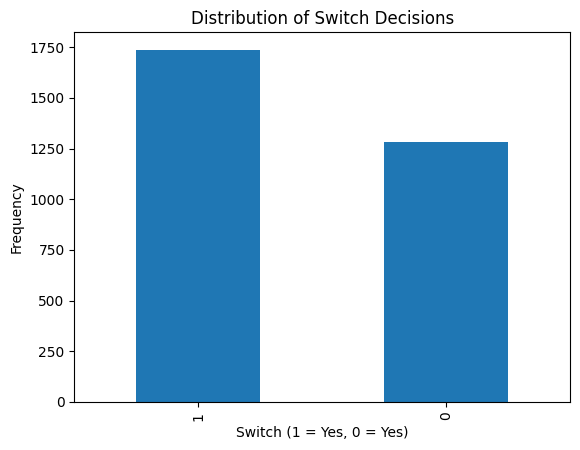

In [7]:
# Bar chart
switch_counts.plot(kind='bar')
plt.title('Distribution of Switch Decisions')
plt.xlabel('Switch (1 = Yes, 0 = Yes)')
plt.ylabel('Frequency')
plt.show()

#### ARSENIC

In [8]:
# Summary statistics for 'arsenic'
arsenic_summary = dataset['arsenic'].describe()
print(arsenic_summary)

count    3020.000000
mean        1.656930
std         1.107387
min         0.510000
25%         0.820000
50%         1.300000
75%         2.200000
max         9.650000
Name: arsenic, dtype: float64


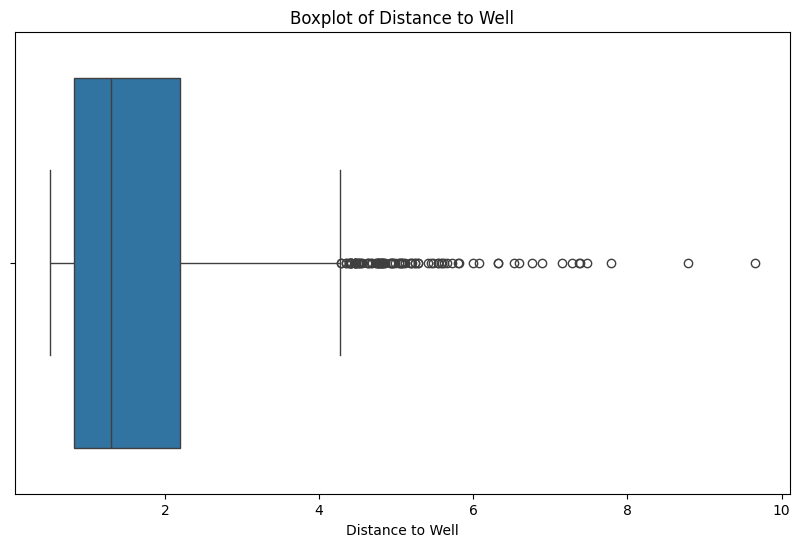

In [9]:
# Boxplot for 'arsenic'
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['arsenic'])
plt.title('Boxplot of Distance to Well')
plt.xlabel('Distance to Well')
plt.show()


> The graph is very right skewed! Logistic regression is quite robust to skewed predictor variables, We take the logarithm of it to mitigate the outliers

In [10]:
# Log transformation
dataset['log_arsenic'] = np.log1p(dataset['arsenic'])

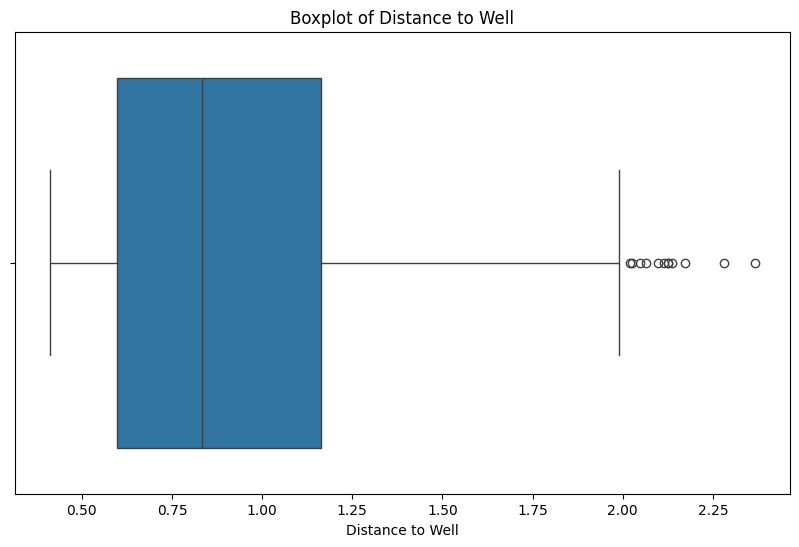

In [11]:
# Boxplot for 'dist'
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['log_arsenic'])
plt.title('Boxplot of Distance to Well')
plt.xlabel('Distance to Well')
plt.show()

#### DIST

In [12]:
# Summary statistics for 'dist'
dist_summary = dataset['dist'].describe()
print(dist_summary)

count    3020.000000
mean       48.331863
std        38.478675
min         0.387000
25%        21.117250
50%        36.761499
75%        64.041000
max       339.531006
Name: dist, dtype: float64


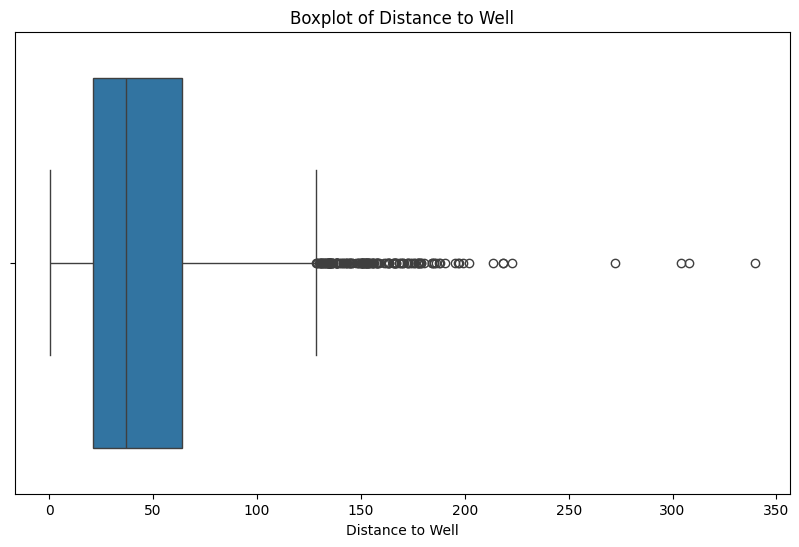

In [13]:
# Boxplot for 'dist'
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['dist'])
plt.title('Boxplot of Distance to Well')
plt.xlabel('Distance to Well')
plt.show()


In [14]:
dataset['log_dist'] = np.log1p(dataset['dist'])

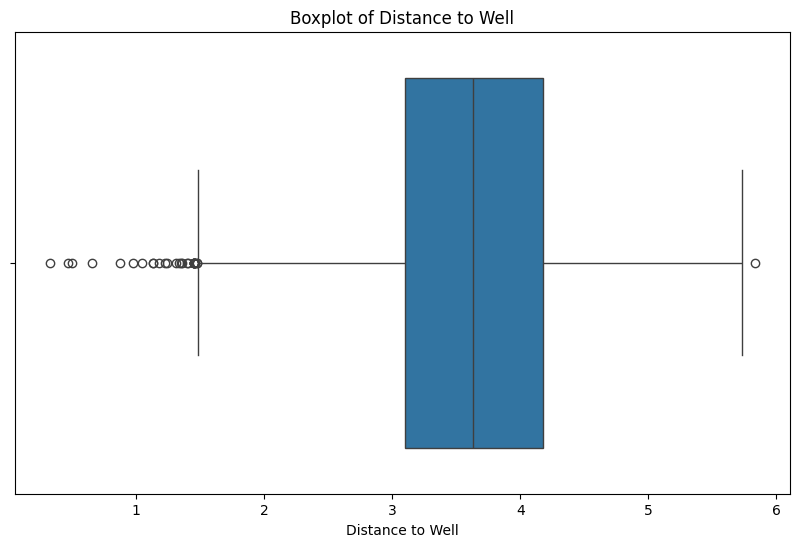

In [15]:
# Boxplot for 'dist'
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['log_dist'])
plt.title('Boxplot of Distance to Well')
plt.xlabel('Distance to Well')
plt.show()

#### ASSOC

In [17]:
# Frequency table for 'assoc'
assoc_counts = dataset['assoc'].value_counts()
print(assoc_counts)

assoc
0    1743
1    1277
Name: count, dtype: int64


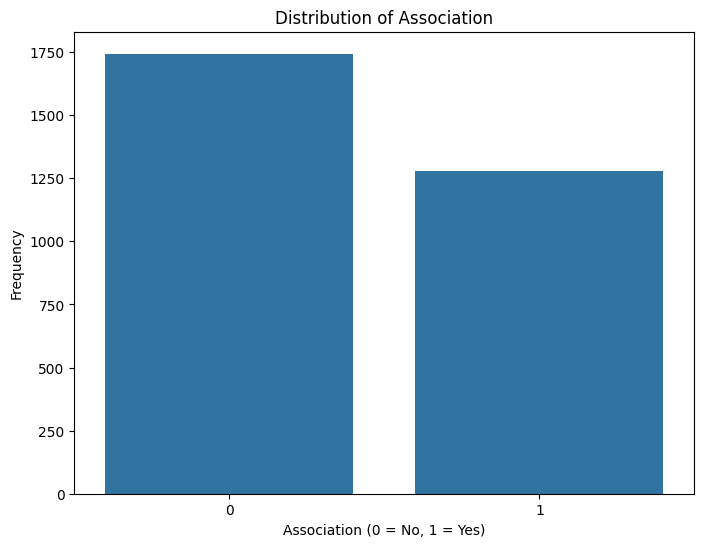

In [19]:
# Bar chart for 'assoc'
plt.figure(figsize=(8, 6))
sns.barplot(x=assoc_counts.index, y=assoc_counts.values)
plt.title('Distribution of Association')
plt.xlabel('Association (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

#### Education

In [21]:
# Summary statistics for 'education'
education_summary = dataset['educ'].describe()
print(education_summary)

count    3020.000000
mean        4.828477
std         4.017317
min         0.000000
25%         0.000000
50%         5.000000
75%         8.000000
max        17.000000
Name: educ, dtype: float64


In [26]:
dataset.head()

,switch,arsenic,dist,assoc,educ,log_arsenic,log_dist
0,1,2.36,16.826000,0,0,1.211941,2.880658
1,1,0.71,47.321999,0,0,0.536493,3.877887
2,0,2.07,20.966999,0,10,1.121678,3.089541
3,1,1.15,21.486000,0,12,0.765468,3.112893
4,1,1.10,40.874001,1,14,0.741937,3.734665


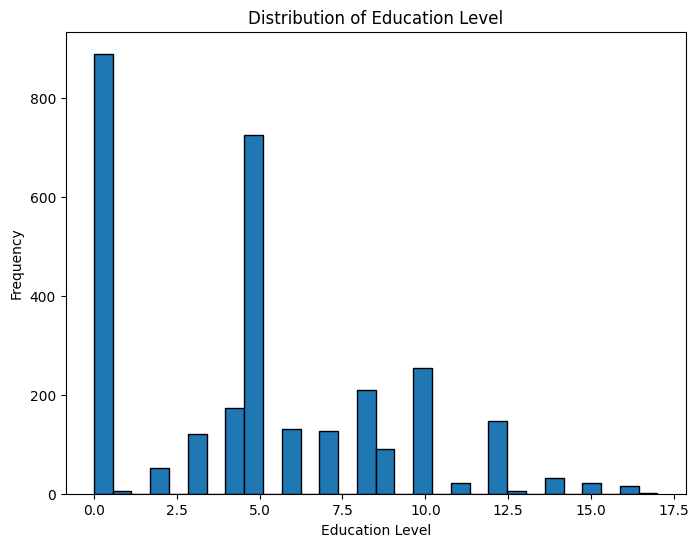

In [25]:
# Histogram for 'education'
plt.figure(figsize=(8, 6))
plt.hist(dataset['educ'], bins=30, edgecolor='k')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

#### Arsenic vs. Switch
**Assumption:** Families are more likely to switch if the 'arsenic' level is high.

In [29]:
dataset.head()

,switch,arsenic,dist,assoc,educ,log_arsenic,log_dist
0,1,2.36,16.826000,0,0,1.211941,2.880658
1,1,0.71,47.321999,0,0,0.536493,3.877887
2,0,2.07,20.966999,0,10,1.121678,3.089541
3,1,1.15,21.486000,0,12,0.765468,3.112893
4,1,1.10,40.874001,1,14,0.741937,3.734665


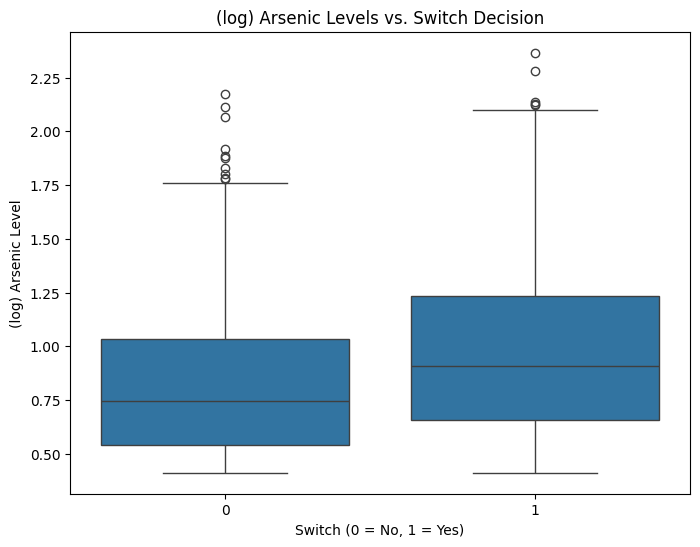

In [30]:
# Boxplot of 'arsenic' by 'switch'
plt.figure(figsize=(8, 6))
sns.boxplot(x='switch', y='log_arsenic', data=dataset)
plt.title('(log) Arsenic Levels vs. Switch Decision')
plt.xlabel('Switch (0 = No, 1 = Yes)')
plt.ylabel('(log) Arsenic Level')
plt.show()

The assumption seems to be valid, the ones that have switched (1) have higher median of arsenic level!

#### Distance vs. Switch
**assumption:** The distance to the nearest *well* might influence the decision to switch.

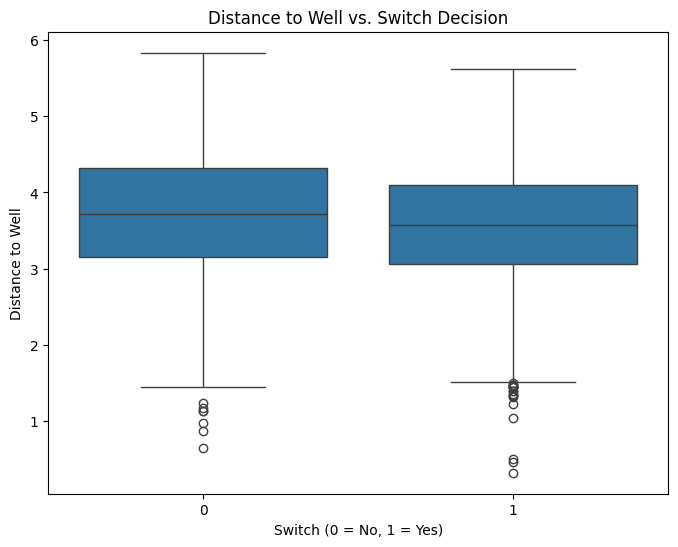

In [36]:
# Boxplot of 'dist' by 'switch'
plt.figure(figsize=(8, 6))
sns.boxplot(x='switch', y='log_dist', data=dataset)
plt.title('Distance to Well vs. Switch Decision')
plt.xlabel('Switch (0 = No, 1 = Yes)')
plt.ylabel('Distance to Well')
plt.show()

The ones that have switched (1) have slightly lower median than the ones that haven't switched (0)!

#### Association vs. Switch
**assumption:** Being part of an association might affect the switching decision!

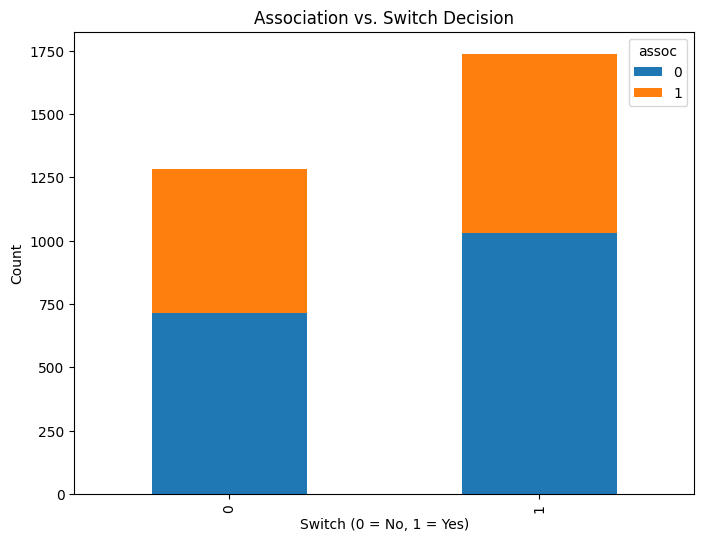

In [37]:
# Bar plot of 'assoc' by 'switch'
assoc_switch_counts = dataset.groupby('switch')['assoc'].value_counts().unstack()
assoc_switch_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Association vs. Switch Decision')
plt.xlabel('Switch (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

The assumption seems not really be true! The proportion of being part of an association or not, seems to be equal in each category (switch) or (no switch)!

#### Education vs. Switch

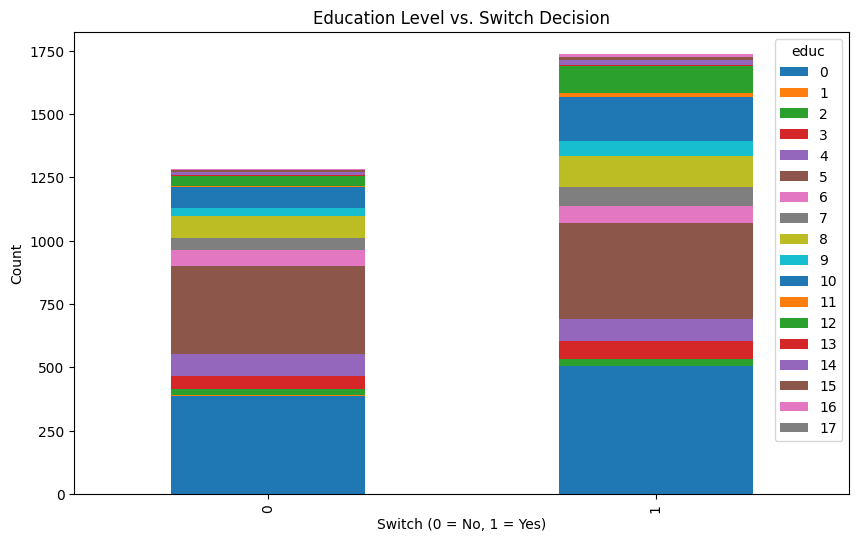

In [39]:
# Bar plot of 'education' by 'switch'
education_switch_counts = dataset.groupby('switch')['educ'].value_counts().unstack()
education_switch_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Level vs. Switch Decision')
plt.xlabel('Switch (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### Correlation Matrix

               switch  log_arsenic  log_dist     assoc      educ
switch       1.000000     0.198189 -0.084663 -0.035915  0.076371
log_arsenic  0.198189     1.000000  0.211478 -0.027062 -0.027033
log_dist    -0.084663     0.211478  1.000000 -0.011447 -0.042102
assoc       -0.035915    -0.027062 -0.011447  1.000000 -0.031367
educ         0.076371    -0.027033 -0.042102 -0.031367  1.000000


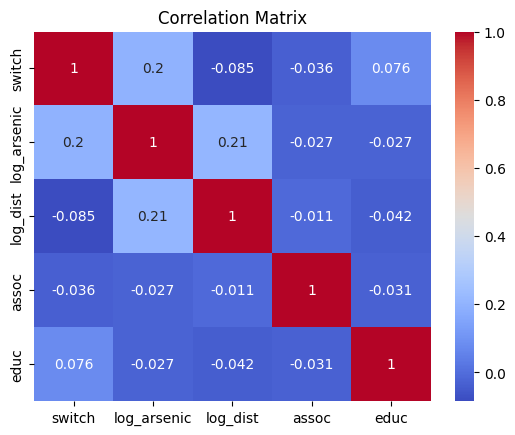

In [41]:
# Correlation matrix
correlation_matrix = dataset[['switch', 'log_arsenic', 'log_dist', 'assoc', 'educ']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Multiple Logistic Regression

In [42]:
from sklearn.model_selection import train_test_split

# Define the predictors and the target variable
X = dataset[['log_arsenic', 'log_dist', 'assoc', 'educ']]
y = dataset['switch']

# Split the data into training and test sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Adding constant to the training and test sets
import statsmodels.api as sm

# Add a constant to the training set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [44]:
# Fit Logistic Regression Model
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.651186
         Iterations 5


In [45]:
# Print the summary of the model 
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 switch   No. Observations:                 2114
Model:                          Logit   Df Residuals:                     2109
Method:                           MLE   Df Model:                            4
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                 0.04366
Time:                        14:32:13   Log-Likelihood:                -1376.6
converged:                       True   LL-Null:                       -1439.5
Covariance Type:            nonrobust   LLR p-value:                 3.255e-26
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4137      0.235      1.760      0.078      -0.047       0.875
log_arsenic     1.2526      0.136      9.179      0.000       0.985       1.520
log_dist       -0.3783      0.060     -6.344    

**Intercept:** When all predictors (log_arsenic, log_dist, assoc, and educ) are zero, the estimated log odds of switching to a well with lower arsenic content are 0.4137. Converting this to probability, we get: $$\text{P(switch)} = \frac{e^{0.4137}}{1 + e^{0.4137}} \approx 0.602$$
This means that the estimated probability of switching is approximately 60.2%!  

**log_arsenic:** For a one-unit increase in the log-transformed arsenic level, the log odds of switching increase by 1.2526, assuming all other variables remain constant. (This corresponds to a significant increase in the likelihood of switching.)

**log_dist:** For a one-unit increase in the log-transformed distance to the well, the log odds of switching decrease by 0.3783, assuming all other variables remain constant. (This indicates that families are less likely to switch to a well with lower arsenic content as the distance to the well increases.)

**assoc:** Families associated with an organization have log odds of switching that are 0.0985 units lower than those not associated with an organization, assuming all other variables remain constant.

**educ:** For each additional year of education, the log odds of switching to a well with lower arsenic content increase by 0.0411, assuming all other variables remain constant. (This indicates that higher education levels are associated with a higher probability of switching.)

In [46]:
# Predict & Evaluate the model
y_pred_probs = logit_model.predict(X_test)

# Convert probabilities to binary outcomes (threshold = 0.5)
y_pred = (y_pred_probs >= 0.5).astype(int)

In [47]:
# Calculating the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6280353200883002
